# Week 6 Project Introduction - Data Pipeline

This week's project gives a brief overview into Data Engineering by extracting tweets from twitter and perform a Sentiment analysis on them. We separate the whole workflow in small managable parts where all are **connected to each other** and can be launched or stopped with a single command.

The **data** this week will be real-time tweets what we access using the **Twitter API**.

There are quite a few **new concepts** that we will cover this week:
- [Application Programming Interfaces (APIs)](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/api/README.html)
- [Docker](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/docker/README.html)/[Docker-Compose](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/docker/compose.html)
- NoSQL Databases (we use [MongoDB](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/mongodb/README.html))
- [ETL (Extract-Transform-Load](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/etl/README.html)
- [Sentiment Analysis](https://spiced.space/stationary-sriracha/ds-course/chapters/project_pipeline/sentiment_analysis.html)

The animation below shows this week's workflow as an illustrated analogy:

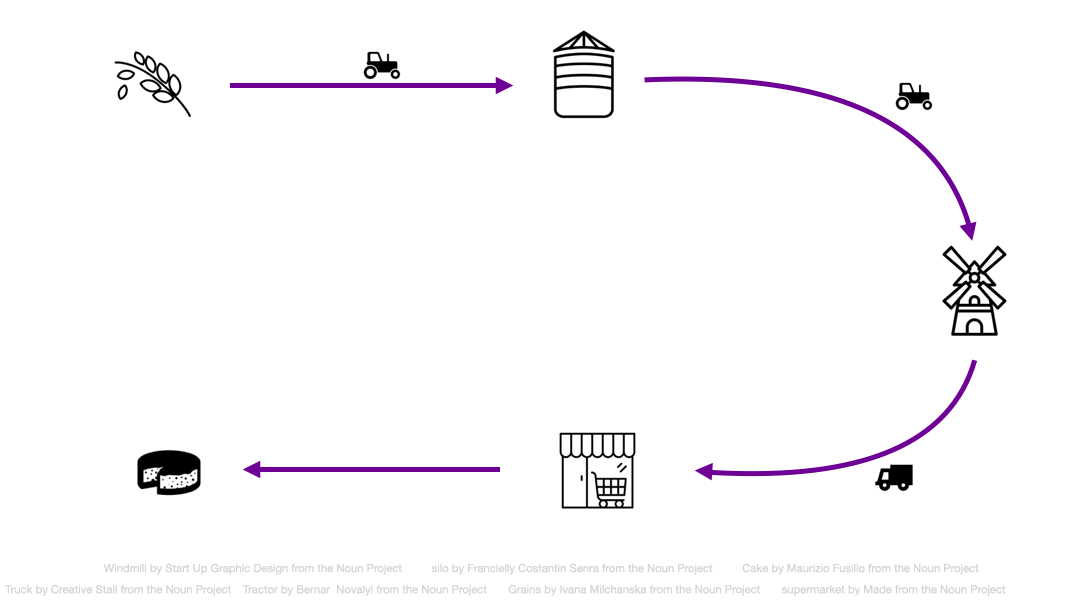

In [1]:
#Pipeline animation
from IPython.display import Image, display
display(Image(filename="intro_pipeline.gif", format='gif'))

# To run it again, run the cell again!

Manage and run and entire data stream / “pipeline”, where each component of the pipeline is its own, isolated [“microservice”](https://aws.amazon.com/microservices/) managed by Docker Compose.

In simpler terms: Run a complex, interconnected piece of software (composed of 5 individual moving parts) in such a way that all components run continuously and talk to each other, and the whole pipeline can be launched (and stopped) with a single command.

# API - Application Programming Interfaces

Why?
- APIs are the data source for the data pipeline we are building this week. 
- In general, APIs are a great data source.

What?

From the course materials:

- An API, short for Application Programming Interface, is a concept used to describe –essentially – a piece of intermediary software (the interface) that facilitates communication between 2 other pieces of software (the applications).
- This is a very general definition. When we talk about APIs, we mostly refer to Web APIs.
- API = website providing data in a format more machine-readable than HTML.
 - We still submit an HTTP request though, e.g. with the   library.
- [Rest](https://www.redhat.com/en/topics/api/what-is-a-rest-api#:~:text=A%20REST%20API%20(also%20known,by%20computer%20scientist%20Roy%20Fielding.) / RESTful APIs:
 - REST = representational state transfer.
 - They conform to particular architectural standards — software developers creating them, had to pay attention to certain things, and design them in certain way; it's a way of standardizing APIs some. "Best practices" for designing APIs.

### What makes a Web API better than scraping? 

- We still send HTTP `requests` but this time we get different data back!
- A Web API provides data in a **more machine-readable format** than HTML (mostly JSON) 
    - In week 4: we send an HTTP request, and get back HTML. 
    - Now: we send an HTTP request, get back JSON.
- With an API we know we are definitely allowed to access the data we are using, and on what terms
- For larger data providers (eg. Twitter) there are often helper libraries (+ documentation!) that make the process even easier. This week we will be using `tweepy`.

# Testing API 

In [6]:
"""
Berlin public transport API
"""

import requests

# BASE_URL = 'https://v5.vbb.transport.rest'

# # find a station
# name = 'moritzplatz'
# url = f"{BASE_URL}/locations?poi=false&addresses=false&query={name}"
# station_id = requests.get(url).json()[0]['id']

# # look up departures
# print('\nNext connections from U Moritzplatz:\n')

# url = f'{BASE_URL}/stops/{station_id}/departures?duration={10}'

url = 'https://v5.vbb.transport.rest/stops/900000013101/departures?duration=10'
j = requests.get(url).json()

for e in j:
    print(e['plannedWhen'][11:-9], '  ', e['line']['name'], e['direction'])

13:54    M29 U Hermannplatz
13:57    M29 Grunewald, Roseneck
13:58    U8 S+U Hermannstr.
13:59    M29 U Hermannplatz
13:58    U8 S+U Wittenau
14:03    U8 S+U Hermannstr.
14:04    M29 U Hermannplatz
14:02    M29 U Wittenbergplatz
14:03    U8 S+U Wittenau


In [4]:
url

'https://v5.vbb.transport.rest/stops/900000013101/departures?duration=10'

In [3]:
j

[{'tripId': '1|36953|43|86|19042022',
  'stop': {'type': 'stop',
   'id': '900000013101',
   'name': 'U Moritzplatz',
   'location': {'type': 'location',
    'id': '900013101',
    'latitude': 52.503737,
    'longitude': 13.410944},
   'products': {'suburban': False,
    'subway': True,
    'tram': False,
    'bus': True,
    'ferry': False,
    'express': False,
    'regional': False}},
  'when': '2022-04-19T13:53:00+02:00',
  'plannedWhen': '2022-04-19T13:53:00+02:00',
  'delay': 0,
  'platform': '2',
  'plannedPlatform': '2',
  'direction': 'S+U Wittenau',
  'provenance': None,
  'line': {'type': 'line',
   'id': 'u8',
   'fahrtNr': '19741',
   'name': 'U8',
   'public': True,
   'adminCode': 'BVU',
   'productName': 'U',
   'mode': 'train',
   'product': 'subway',
   'operator': {'type': 'operator',
    'id': 'berliner-verkehrsbetriebe',
    'name': 'Berliner Verkehrsbetriebe'},
   'symbol': 'U',
   'nr': 8,
   'metro': False,
   'express': False,
   'night': False,
   'color': {'f

# Tweepy

In [7]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Connect to twitter API
import tweepy
import twitter_keys
client = tweepy.Client(bearer_token=twitter_keys.Bearer_Token)

### Look up a user by their user name

(For `user_fields` parameters check here https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user

In [34]:
gavin = client.get_user(username='gavofyork',user_fields=['name','id','created_at'])
user = gavin.data
print(gavin)

Response(data=<User id=33962758 name=Gavin Wood username=gavofyork>, includes={}, errors=[], meta={})


We can get all the data from our user as a dictionary:

In [35]:
dict(user)

{'created_at': datetime.datetime(2009, 4, 21, 16, 55, 10, tzinfo=datetime.timezone.utc),
 'username': 'gavofyork',
 'name': 'Gavin Wood',
 'id': 33962758}

... or get out individual pieces of information:

In [36]:
print(f'the user with name {user.name} and ID {user.id} created their twitter account on {user.created_at}')

the user with name Gavin Wood and ID 33962758 created their twitter account on 2009-04-21 16:55:10+00:00


### Look at a user's timeline
(for `tweet_fields` parameters check here https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet)

In [38]:
gavin_tweets = client.get_users_tweets(id=user.id, tweet_fields=['id','text','created_at'],max_results=100)
print(gavin_tweets.data)

[<Tweet id=1515037557037404168 text='@kusamanetwork ? https://t.co/8bK9mziXrF'>, <Tweet id=1514248566633644042 text='RT @Tether_to: #Tether USDt launches on @kusamanetwork\nRead more here: https://t.co/b2h3THRNbU\n https://t.co/BtJTpzO3oH'>, <Tweet id=1513428754000982019 text='Power to the builders ✊💪 Perhaps in the near future the new primitives for @Polkadot governance can be used here too.. https://t.co/CxEhUjAXua'>, <Tweet id=1513258366386192391 text='RT @DonnieBigBags: Community call will happen on the @MoonsamaNFT discord today at 4pm UTC: https://t.co/xrI3KCoQh6\n\nBut it will also happe…'>, <Tweet id=1508841455510425600 text="A nice writeup of @polkadot's/@kusamanetwork's XCMv2 by @quarkslab now published at https://t.co/iOpaOeKOFv Look out for another one on the upcoming XCMv3...">, <Tweet id=1507056763773853700 text="RT @alexeiZamyatin: Finally, it's live. \n\nYou can now mint trustless $kBTC on @KaruraNetwork and use it on @MoonriverNW and @KaruraNetwork…">, <Tweet id=150565

We can write the tweets to a text file:

In [16]:
for tweet in gavin_tweets.data:
    print(f"The user {user.name} at {tweet.created_at} wrote: {tweet.text}\n")
    file = open('gavin_tweets.txt',mode='a',encoding='utf8')
    file.write('\n\n'+tweet.text)
    file.close()

The user Gavin Wood at 2022-04-15 18:41:16+00:00 wrote: @kusamanetwork ? https://t.co/8bK9mziXrF

The user Gavin Wood at 2022-04-13 14:26:06+00:00 wrote: RT @Tether_to: #Tether USDt launches on @kusamanetwork
Read more here: https://t.co/b2h3THRNbU
 https://t.co/BtJTpzO3oH

The user Gavin Wood at 2022-04-11 08:08:27+00:00 wrote: Power to the builders ✊💪 Perhaps in the near future the new primitives for @Polkadot governance can be used here too.. https://t.co/CxEhUjAXua

The user Gavin Wood at 2022-04-10 20:51:24+00:00 wrote: RT @DonnieBigBags: Community call will happen on the @MoonsamaNFT discord today at 4pm UTC: https://t.co/xrI3KCoQh6

But it will also happe…

The user Gavin Wood at 2022-03-29 16:20:10+00:00 wrote: A nice writeup of @polkadot's/@kusamanetwork's XCMv2 by @quarkslab now published at https://t.co/iOpaOeKOFv Look out for another one on the upcoming XCMv3...

The user Gavin Wood at 2022-03-24 18:08:26+00:00 wrote: RT @alexeiZamyatin: Finally, it's live. 

You can now mi

### Using the `Paginator` object from `tweepy`: 
Getting more than 100 tweets at a time

#### Search recent tweets

In [32]:
# - means NOT
search_query = "#Ukraine -is:retweet"

#option to extract tweets of a particular language add `lang` parameter eg lang:de

cursor = tweepy.Paginator(
    method=client.search_recent_tweets,
    query=search_query,
    tweet_fields=['author_id', 'created_at', 'public_metrics'],
    user_fields=['username']
).flatten(limit=100)

for tweet in cursor:
     print(tweet.data)


{'id': '1516433557320777737', 'text': 'Die #USA und die #EU haben derzeit kein Interesse an Frieden. Ihre befreundeten Waffenhändler sind zu sehr damit beschäftigt, mit dem Krieg in der #Ukraine Milliarden von Dollar zu verdienen. https://t.co/QuTV4je6B3', 'created_at': '2022-04-19T15:08:28.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '789094371551485953'}
{'id': '1516433555076878347', 'text': '19/04/2022 #StandWithUkraine #Ukraine #DigitalResistance ** Not Verified** https://t.co/RVQ77ur1Ic', 'created_at': '2022-04-19T15:08:28.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '88196314'}
{'id': '1516433553696780288', 'text': 'آسوشیتدپرس :\nدر حالیکه روسیه در اوائل جنگ در #اوکراین نسبت به تقاضاهای سوری برای شرکت در جنگ،به خود می\u200cبالید،اما اکنون مقامات آمریکایی و فعالان نظارت بر اوضاع #سوریه می\u200cگویند هنوز نیروی قابل توجهی از منطقه #خاورمیانه به جنگ

{'created_at': '2022-04-19T15:08:04.000Z', 'author_id': '1043779858814423040', 'id': '1516433454497419274', 'text': '#Ukraine\nLe FSB balance sur internet les noms, mails et certaines adresses des employés de HMG Russia, entité rattachée au Foreign Office, présentée comme unité interagences des services de renseignement britanniques, créée en 2017 ⬇️', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T15:08:03.000Z', 'author_id': '156975764', 'id': '1516433450663821324', 'text': '#UkraineUncensored...\n\nUnsere Offensive im #Donbass Gebiet...\n\nManchmal klemmt es, aber wir stecken etwas Liebe mit rein und es läuft...\n\nBilder aus unseren Panzern.\n\n#StayWithUkraine #Odessa #Charkiv #Kiev #UkraineUnderAttaсk #Ukraine https://t.co/mIbgCm5WUP', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T15:08:02.000Z', 'author_id': '134887865', 'id': '151643

{'created_at': '2022-04-19T15:07:35.000Z', 'author_id': '1498772072692080644', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516433333860937741', 'text': '#ukraine https://t.co/f55anx4ASO'}
{'created_at': '2022-04-19T15:07:34.000Z', 'author_id': '980196486217650176', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516433328802566150', 'text': '#Putin gives honorary title to Russian brigade accused of war crimes in #Bucha #Ukraine https://t.co/1NRsBxMARD'}
{'created_at': '2022-04-19T15:07:30.000Z', 'author_id': '1510737932247785478', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516433315074617346', 'text': "#Taiwan's Foreign Minister Joseph Wu on the #China-#Russia relationship and Taiwan's support for #Ukraine. https://t.co/73aXGV6DkT"}
{'created_at': '2022-04-19T15:07:30.000Z', 'author_id': '47796987', 'public_metrics': {'r

{'id': '1516433195297910784', 'author_id': '164263382', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}, 'created_at': '2022-04-19T15:07:02.000Z', 'text': '#Ukraine update at today\'s @UNGeneva briefing:\n\n"This is the fastest-growing refugee crisis in Europe since the WW II," - @Refugees \n\n"So far, 132 attacks have impacted health facilities," - @who \n\n"#Mariupol would probably need about 2-3 trucks a day of food alone," - @WFP https://t.co/eCDZKI1M2F'}
{'id': '1516433187907706880', 'author_id': '1052990983304966144', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:07:00.000Z', 'text': '#BREAKING NOW: U.S. Sending In The Heavy Guns To  #Ukraine. American Forces To Train #Ukrainians On Massive Weapon. RAW CLIP \n\n#UkraineWar #RussiaUkraineWar #Russian #pentagon #UkraineRussiaWar #Putin https://t.co/yJWYUp0Xm5'}
{'id': '1516433186628280321', 'author_id': '42627979'

{'text': '🕊🇺🇦\n\n#Ukraine #StandWithUkraine #StopWarInUkraine #StopRussianAgression #WARINUKRAINE 🙏 https://t.co/ZUIAJ6FJtv', 'id': '1516433074820730882', 'author_id': '1507340175340458010', 'created_at': '2022-04-19T15:06:33.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'this is completely true, stop with "sanctions" or the useless UN, #Ukraine needs fighter jets, bombers ... @NATO Ukraine needs you right now! #StandWithUkraine #UkraineRussiaWar #UkraineInvasion #ArmUkraineNow https://t.co/n22rnKehCJ', 'id': '1516433074086727691', 'author_id': '106769233', 'created_at': '2022-04-19T15:06:33.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'At 8.2%, #India to be fastest growing #economy in #FY23 despite Ukraine war headwinds:*\n\n#India: 8.2%\n#SaudiArabia: 7.6%\n#China: 4.4%\n#Canada: 3.9%\nUS: 3.7%\nU.K: 3.7%\n#France: 2.9%\n#Germany: 2.1%\n#Mexico: 2.0%\n#Brazil

{'text': '#Ukraine #WARINUKRAINE https://t.co/4ze57FccL4', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:05:55.000Z', 'author_id': '1283510742520672257', 'id': '1516432915634298882'}
{'text': '@kentrodexia Είναι λίγο πιο αδύναμος και περιθωριακός από τον αμερικανικό, γιατί στη #Russia δεν είναι απλή η διαδικασία της οπλοφορίας, όπως στις #USA και φυσικά δεν έχει εξουσία, όπως συμβαίνει στην #Ukraine, όπου έχει το ρόλο παρακράτους επί 8 χρόνια εμφυλίου και εθνικιστικού καθαρτηρίου.', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:05:55.000Z', 'author_id': '211011537', 'id': '1516432914061348864'}
{'text': '@PUI_FRANCE @franceinfo 🇺🇦🚒🚑  Cinq ambulances de l’ONG @PUI_FRANCE vont partir vers l’#Ukraine depuis #Limoges https://t.co/Y0lJuMbhW0', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'creat

{'text': '#MARIUPOL—No civilians were released by #Azov either, leading one to conclude that the claims of civilians @ #Azovstal were false or that #Ukraine|ian Azov fighters are holding them as human shields (former—far more likely). Strikes by #RF forces on Azovstal have now resumed. 2/2 https://t.co/eCzi1GavkL', 'author_id': '381214787', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 29, 'quote_count': 0}, 'created_at': '2022-04-19T15:05:06.000Z', 'id': '1516432710536998919'}
{'text': 'P2\n\nVideo shows &gt;&gt; even God is with #Russians coz it rains🌧like big snow ( snowballs) kinds bombardment of #ukraine in #Kharkiv/#Kharkov (closes to #Izium city\n\nWestern media accusing Russia to do genocide in Izium ( the Q is why #RussianArmy to do that? When they upper hands? https://t.co/8ytbnawb2A', 'author_id': '4016082256', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:05:03.000Z', 'id': 

{'text': 'new drone video from #Mariupol leaves little doubt that those people sheltering inside the steel factory, including many children, are in the worst of circumstances\n\n#Ukraine \nhttps://t.co/j6AWn2OsW6', 'author_id': '1128720706278252544', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-04-19T15:04:08.000Z', 'id': '1516432466852069386'}
{'text': '#NowPlaying\n➡️https://t.co/FdOdubVSWC\n\n@GA_Dillon @camangelspromo #onmfc #EndPoliceBrutality #RT #badhombregirls #RepBX #love #girls #crypto #findom #ukraine #kfc #bts #btc #bsc #bbb22 Delta #WWERaw Warriors #winmetawin Masks #metaverse #cryptocurrency https://t.co/YYSvjVBJT4', 'author_id': '1452407121186861059', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-04-19T15:04:07.000Z', 'id': '1516432463660261385'}
{'text': '#Ukraine \n#UkraineRussiaWar\n#الحرب_الروسيه_الاوكرانيه \n#روسيا_اوكرانيا', 'author

{'id': '1516432287017193477', 'text': '#Ukraine remains in a “perilous” position despite recent setbacks suffered by the invading Russian forces, Boris #Johnson has warned. \nhttps://t.co/Hc8XBMIG7l', 'created_at': '2022-04-19T15:03:25.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'author_id': '2325342918'}
{'id': '1516432280612446214', 'text': '@MalcolmNance @CIA @MSNBC @NBCNews @ZelenskyyUa, if #Ukraine wants to win/stop the #UkraineRussiaWar, they have to kill Russians, more of them than Ukraines the Russians are murdering.\n\nCar bombs in Moscow &amp; Saint Petersburg.\n\n"An eye for an eye."\n\n#PutinWarCrimes', 'created_at': '2022-04-19T15:03:24.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1387796979472863234'}
{'id': '1516432279110926341', 'text': 'Kharkiv\n#Ukraine #Kharkiv #Russia https://t.co/qCtR5Rq0IW', 'created_at': '2022-04-19T15:03:23.000Z', 'public_

{'created_at': '2022-04-19T15:02:47.000Z', 'author_id': '2564392676', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'id': '1516432127256104977', 'text': '#NowPlaying\n➡️https://t.co/kk62t6G9B9\n\n#BestFanArmy\n➡️https://t.co/lCpAuQyfWd\n\n@GA_Dillon @camangelspromo #EndPoliceBrutality #RT #RepBX #badhombregirls #love #girls #crypto #findom #ukraine #kfc #bts #btc #bsc #bbb22 Delta #WWERaw Warriors #winmetawin Masks #cryptocurrency https://t.co/cIglX4lXbv'}
{'created_at': '2022-04-19T15:02:46.000Z', 'author_id': '525453688', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516432124051664897', 'text': 'https://t.co/vXhAbWiGid\n#Mariupol \n#Ukraine'}
{'created_at': '2022-04-19T15:02:46.000Z', 'author_id': '1029663452372058112', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516432122571018242', 'text': 'Vergewaltigung Video - Übersetzung

{'text': 'More than 900 civilians found dead near Kyiv See More ==&gt; https://t.co/mizTlpSXfK   #diet #keto #puttin #russia #ukraine #war # #Kyiv #mariupolattack #biden https://t.co/44UQFszxuN', 'id': '1516432002504970257', 'author_id': '934982760', 'created_at': '2022-04-19T15:02:17.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'https://t.co/UgRAIdufcs #Ukraine', 'id': '1516432001884209152', 'author_id': '1476937165678559232', 'created_at': '2022-04-19T15:02:17.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'Das #NDR Fernsehen übernimmt den ARD Brennpunkt zum Krieg gegen die #Ukraine im Anschluss an die @tagesschau um 20.15 Uhr. Mehr: https://t.co/rn3nt66Q92 https://t.co/DVsZFA7kV0', 'id': '1516431999476641799', 'author_id': '4734179069', 'created_at': '2022-04-19T15:02:17.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_c

{'created_at': '2022-04-19T15:01:30.000Z', 'author_id': '1341014009173127170', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516431801467686924', 'text': '#azerbaycan #turkiye #turk_az #rusia #iran #gkhndmr #ukraine #moscow #Britain #bakü #china #Greece #covid_19 #usa #Italia #India #korea #japan #Pakistan #france #Spain #georgia #Bosnia #Netherlands #germany #Indonesia #Sweden #Россия #nato https://t.co/qCTkyLiJ9A'}
{'created_at': '2022-04-19T15:01:29.000Z', 'author_id': '153579796', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516431798833750016', 'text': 'Simulated the strike on the Moskva by altering the OODA loop and testing some different theories. Interesting how little it takes to let a missile through, literally seconds. #osint #moskva #ukraine https://t.co/JZyQaLTUFt'}
{'created_at': '2022-04-19T15:01:23.000Z', 'author_id': '1406650146', 'public_metrics': {'retweet_c

{'text': "@LugerMaik @cotedazurman Nein, es fehlen noch #Irland und #Portugal zu Putins Wohlbefinden, damit endlich ganz Westeuropa zu Russland gehört. Ach ja, die #Denazifikation muss so wie jetzt in der #Ukraine kompromisslos durchgeführt werden, dann klappt's bestimmt. https://t.co/m4wuULglsZ", 'author_id': '2807115121', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:00:59.000Z', 'id': '1516431674598477845'}
{'text': "Look at them, don't forget the bravery they show now Russia has dropped a big bomb and the world didn't close the sky,each nato country has blood on their hands #Ukraine #ArmUkraineNow #StopPutinNOW #NEVERAGAIN #ClosetheSkyOverUkraine #HelpUkraine https://t.co/XJ7t2CuQK2", 'author_id': '1499419670180507660', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:00:55.000Z', 'id': '1516431655291994121'}
{'text': '#Ukraine #Russia

{'id': '1516431523469221896', 'author_id': '539035503', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-04-19T15:00:23.000Z', 'text': 'Ironic that the rich are supporting the #NWO when it\'s the #NWO screaming:\n\n"You will own nothing but you will be happy."\n\n#Ukraine is the financial hub of the #NWO.\n\n#Russia #IStandWithPutin https://t.co/8nAnrCBT8g'}
{'id': '1516431518943653905', 'author_id': '1338538116215345156', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T15:00:22.000Z', 'text': 'Ukrainischer Admiral im Potsdamer Yachtclub – Der ukrainische Vizeadmiral a.D. Boris Kozhyn sprach vor Parlamentariern und Mitgliedern der Offizier-Messe Berlin im Potsdamer Yachtclub. Mehr 👉https://t.co/dPBiIkxa3P\n.\n#krieg #Ukraine #Russland #Sewastopol #ukrainischeradmiral'}
{'id': '1516431518570274821', 'author_id': '1464500060847230984', 'public_metrics': {

{'created_at': '2022-04-19T15:00:01.000Z', 'author_id': '60017224', 'id': '1516431428380151815', 'text': "#Ukraine has insufficient storage capacity even for its reduced 2022 grain harvest, the United Nations' World Food Programme said on Tuesday, with the country struggling to export existing stocks during the invasion by #Russia\n\nhttps://t.co/dydam4ST5e", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T15:00:00.000Z', 'author_id': '841364821', 'id': '1516431427683770370', 'text': 'Žena hrdiny s dárky, to by mohl být prodejní hit.\n#Ukrajina #Ukraine #RussianWarCrimesInUkraine https://t.co/Y4xXw5nI86', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}}
{'created_at': '2022-04-19T15:00:00.000Z', 'author_id': '1463209412760276993', 'id': '1516431426383712265', 'text': '#Breaking - Ukraine\'s presidential chief of staff said on Monday that "the second phase of the war has s

{'text': 'Will the conflict in Ukraine or concerns over high inflation be the crucial area for French voters?\nSee the latest #marketcommentary https://t.co/AXcjeeFMzX\n#ukraine #inflation #frenchelections #investing', 'author_id': '955772922555232256', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:59:12.000Z', 'id': '1516431223966552065'}
{'text': '#Lithuania has banned the public display of the symbols of #Russia’s war against #Ukraine.\n\n#StandWithUkraine #StopRussia https://t.co/3xuZWPS1rh', 'author_id': '1316470358', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 4, 'quote_count': 0}, 'created_at': '2022-04-19T14:59:12.000Z', 'id': '1516431223425540101'}
{'text': 'The Les concernés Daily est en ligne! https://t.co/r1LBZGJhnu Merci à @Babelio #ukraine #emmanuelmacron', 'author_id': '854965272066879489', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote

{'text': 'Çernihiv’de infilak etmeyen patlayıcılar toplanıyor https://t.co/9oj95sRNmu \n#russia #ukraine #haberler #gündem #ibhaber', 'id': '1516431030567243791', 'author_id': '1498694854494277638', 'created_at': '2022-04-19T14:58:26.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': '#Think is out! https://t.co/Y7gcaJgjj6 \n\n#social #media #news Stories via @sarahleah1 @intifada #russia #ukraine', 'id': '1516431027480182787', 'author_id': '53750526', 'created_at': '2022-04-19T14:58:25.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'Thank You, @SpaceX, for #Starlink for #Ukraine! https://t.co/daACemtARu', 'id': '1516431014935019532', 'author_id': '921409205080412161', 'created_at': '2022-04-19T14:58:22.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'text': 'We pray for #Ukraine https://t.co/2aRx7PuBvf', 'id': '151

{'id': '1516430859758407685', 'text': '@Lowkey0nline @FCBarcelona @UEFA @FA\nSupports #Ukraine over #Russia \nillegal occupation of #Ukraine\n\nBut DARE not support #Palestine over the illegal occupation by #Israel\n\nAnd let not forget who were recently further confirmed as an #Apartheid state by @amnesty\n\n#football #doublestandards', 'created_at': '2022-04-19T14:57:45.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '938724387125190656'}
{'id': '1516430853936758787', 'text': 'who missed Patron here 🥰🥰🥰\n\n#ServicePets\n#Ukraine\n#StandUpForUkraine https://t.co/HiN3F5PZtl', 'created_at': '2022-04-19T14:57:44.000Z', 'public_metrics': {'retweet_count': 1, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'author_id': '2294850730'}
{'id': '1516430853899010055', 'text': 'If #Ukraine continues in 2022, US will lose: \n1. China-Russia partnership will strengthen \n2. India will be forced to take side - go for Russia, not 

{'id': '1516430695765352451', 'text': 'Some strange Russian mercenaries were killed near Popasna, some media report, as if from Libya #Ukraine #UkraineWar #Russia #UkraineInvasion https://t.co/odoSUJD93r', 'created_at': '2022-04-19T14:57:06.000Z', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'author_id': '1497262491436519436'}
{'id': '1516430693286486020', 'text': 'Winning assurance in this group keeps me having much trust @legend_odds .. sir you are the best and I salute your source.\n#ubifranklin #BBNajia #Didi #Ferran #Rudiger #Accept #at21 #At10 #shes13 #Jokic #JordanPoole #Haaland #cowgirls #Ojuelegba #Ukraine #Britney #HappyEaster https://t.co/l00wsVYNVO', 'created_at': '2022-04-19T14:57:05.000Z', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 2, 'quote_count': 1}, 'author_id': '1450001298624065536'}
{'id': '1516430681735413771', 'text': '#UkrainiansWillResist  #RussiaInvadedUkraine #UkraineUnderAttack #война

{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1424609744', 'text': 'While Ukranians discuss the new theory called "war of memes" the war goes on...\n\n#Ukraine \n#UkraineRussiaWar \n#Mariupol \n#ucronazis \n\n https://t.co/ozeQVcyamD', 'created_at': '2022-04-19T14:56:25.000Z', 'id': '1516430525262610437'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 1}, 'author_id': '2838950711', 'text': 'The horrific war in #Ukraine has revealed: the UN is ineffective; NATO is limited. The Doha Round of the GATT is now in its 20th year with no answers. It’s time for #Canada to create the new institutions for the 21st century. https://t.co/imasFPqVNW\n\n#cdnpoli #cpcldr @CPC_HQ https://t.co/B7CC0MY7V1', 'created_at': '2022-04-19T14:56:24.000Z', 'id': '1516430518933458952'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '130586562188056985

{'id': '1516430403565158402', 'text': 'The actor from the propagandist video, who plays the role of a “Russian” who is executed by a Ukrainian woman from Lvov, looks very much like a man from #Azovstal, where, according to Ukrainian media there are hundreds of civilians.\n#Mariupol #Ukraine https://t.co/ASUc71ulsQ', 'public_metrics': {'retweet_count': 5, 'reply_count': 1, 'like_count': 12, 'quote_count': 0}, 'created_at': '2022-04-19T14:55:56.000Z', 'author_id': '311468089'}
{'id': '1516430398774984716', 'text': '#missing #missingyoutuber #ukraine https://t.co/ktwbHFYmub', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:55:55.000Z', 'author_id': '1508229976960688135'}
{'id': '1516430393192456194', 'text': 'Guerre en #Ukraine : de #Kharkiv à #Marioupol, l\'armée russe attaque "sur tous les fronts" dans l\'est du pays https://t.co/8i7tDbTv7r', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1

{'author_id': '26987015', 'text': 'From #Moscow #BBCnews #Russia’s correspondent Jenny Hill makes it clear that what’s at stake for #Putin, now that the battle for the #Donbass has begun, is more than just about #Ukraine. From the beginning he has challenged the Western security architecture as a whole. https://t.co/3wGknPcmHk', 'created_at': '2022-04-19T14:55:23.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'id': '1516430262871248909'}
{'author_id': '1228244019076984837', 'text': "We don't have to  #SaveIndianMuslims \n\nBut we have to save India from Muslims. #IPL #BoycottBollywood #BamBam #cryptocurrency #CryptoNews #DelhiRiots2022 #fitness #GeoNews #HindusUnderAttackInIndia #HDFCBank #HumaQureshi #KGF2 #KGFChpater2 #RRvKKR #RCBvsLSG #ShahRukhKhan #Ukraine https://t.co/JZcCm1JXVc", 'created_at': '2022-04-19T14:55:22.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '15164302

{'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'text': 'Russian plane dropped a powerful aerial bomb on the hospital near Azovstal    https://t.co/rGPPlOZtGm \n\n#UkraineWar #Ukraine #StandWithUkraine️', 'author_id': '279352869', 'created_at': '2022-04-19T14:54:39.000Z', 'id': '1516430077751353346'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'Russia has accused Israel of using #Ukraine as a distraction from its illegal occupation of #Palestine — demonstrating how vulnerable #ApartheidIsrael is to charges of hypocrisy just as #VladimirPutin is in his illegal occupation of the Crimea...\n\nhttps://t.co/uAsSm8h31s', 'author_id': '40717489', 'created_at': '2022-04-19T14:54:38.000Z', 'id': '1516430074169499649'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': '#StopPutinNOW #StopRussia #Ukraine #Moldova #Baltics https://t.co/DVVPgC2T

{'id': '1516429874029858828', 'text': 'Ukrainian army forces shelling a building used by #Russian  forces with artillery. The soldiers can be seen fleeing, several soldiers had been killed and some captured. #Donetsk  region.\n#Ukraine #UkraineRussiaWar https://t.co/TIAIkId387', 'public_metrics': {'retweet_count': 2, 'reply_count': 1, 'like_count': 3, 'quote_count': 0}, 'created_at': '2022-04-19T14:53:50.000Z', 'author_id': '769553984'}
{'id': '1516429873656606720', 'text': 'White US Media Networks    Implicit bias against Latino Americans affects all Coverage, Vanderbilt research shows https://t.co/G7qmfbGcZZ @JDBalartMSNBC @MSNBCPR @CNNnewsroom @BBCWorld @cnni #Ukraine \n#MorningJoe', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'created_at': '2022-04-19T14:53:50.000Z', 'author_id': '1206611432063799302'}
{'id': '1516429862633943045', 'text': '.\nProsecutors probe #Russians #Ukraine war crimes.\n\n (from @AP) https://t.co/DCsAYHMVHq', '

{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 5, 'quote_count': 2}, 'text': 'There is no more time to loose! Getting #Germany fully on board in fully supporting Ukraine could make all the difference for #Ukraine and for the future of #Europe. The free world can not risk Putin winning this war. #DemocracyNotAutocracy #StopPutinNOW', 'author_id': '624773568', 'created_at': '2022-04-19T14:53:08.000Z', 'id': '1516429698527645711'}
{'public_metrics': {'retweet_count': 2, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'text': 'The Soviet flag replacing the Ukrainian flag in Mariupol\n\nNobody does that without permission.\n\nIn other words, this is a very official "I\'m back" taunt..\n#RussiaUkraineConflict #Russian #UkraineRussiaWar #Ukraine #Mariupol https://t.co/ozDImEONty', 'author_id': '1371014037329297410', 'created_at': '2022-04-19T14:53:08.000Z', 'id': '1516429695738433537'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'q

{'created_at': '2022-04-19T14:52:40.000Z', 'id': '1516429580634140675', 'text': 'Is there a greater single threat to the lives of children today? #Ukraine children: Killed as he escaped, Elisei is one of 200 child victims https://t.co/67zExfS4gD', 'author_id': '36092148', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T14:52:32.000Z', 'id': '1516429546920329216', 'text': '@CarloMasala1 @unibw_m #Trending #Deutschland: Nur #Russen vergewaltigen Frauen #Ukraine niemals https://t.co/wSMyJIih5D', 'author_id': '1029663452372058112', 'public_metrics': {'retweet_count': 1, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T14:52:29.000Z', 'id': '1516429532105957376', 'text': 'Los organismos internacionales tienen en el tope de su agenda acciones coordinadas para reducir el impacto en los países menos adelantados los efectos de las disrupciones comerciales derivadas del conflicto bélico en #uk

{'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'author_id': '1387782816725835776', 'text': '#USA #India #Australia #Romania #Russia #Estonia #Ukraine #Egypt #Germany #Sweden #Denmark #Iran #Iraq Ishera Elioctriasbe\n#International #Bitcoin \n#Europe #Africa #Asia #SouthAmerica \n#UNI $UNI\n21 hours is the upgrade.  Auto-diligerent upgrade to schoolteacher.  :-D  [&gt;no space]', 'created_at': '2022-04-19T14:51:35.000Z', 'id': '1516429309493321732'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1496578100527837191', 'text': '"Just £60m of UK\'s £220m humanitarian aid for Ukraine delivered by 1 April https://t.co/ONqoJWM8AG" - Tweeted by: @BBCWorld #Ukraine', 'created_at': '2022-04-19T14:51:33.000Z', 'id': '1516429298139373583'}
{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1434844865787936771', 'text': 'Gold price 1952

{'text': "#War #Ukraine  It's more about arms sales than anything IMHO. https://t.co/6h2a1LEuoP", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:50:51.000Z', 'author_id': '24782659', 'id': '1516429123446611988'}
{'text': 'After capturing the town of #Kreminna  in the #Luhansk  region, #Russian forces are looking to advance toward #Kramatorsk and #Sloviansk in the northern part of the Donetsk region, Kyrylenko said.\n\n#Ukraine #Ukraine️RussiaWar \n\nhttps://t.co/sSc3zNT3qC', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:50:49.000Z', 'author_id': '1508856689751379970', 'id': '1516429116647800832'}
{'text': '@CansuOezdemir @ABaerbock Nicht nur die #Tuerkei , sondern auch die #Hamas  in #Israel nutzt den Krieg in der #Ukraine , um ihre gewalttätigen Bestrebungen voranzubringen. Wann wird #China wohl #Taiwan besetzen?', 'public_metrics': {'r

{'created_at': '2022-04-19T14:50:05.000Z', 'author_id': '2887936139', 'id': '1516428929346809868', 'text': "Let's make more submarines.\n\n#Ukraine #StopRussia https://t.co/1zUZwKp6ri", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T14:50:04.000Z', 'author_id': '1512603329397932039', 'id': '1516428927593504778', 'text': 'Best belly fat burner Link In my profile\n✔️✔️💪\n#TheBatman #fitnessgirl #fatburner\n#USA #UK #California #tweet #FitnessMotivation #ohmpawat #HDFCBank #NewYork #losangelesfreaks #chigago\n#NBA #ArizonaFirst #weightlosstips \n#fanart #HappyEaster #Ukraine \n#UnitedStates #weightgain https://t.co/X6Bst6htK5', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}}
{'created_at': '2022-04-19T14:50:04.000Z', 'author_id': '33542120', 'id': '1516428927564144645', 'text': 'The latest The Steffens Daily! https://t.co/rMXy9GHQoK Thanks to @chicabruce #ukraine #israel',

{'author_id': '1275419470014623744', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:49:25.000Z', 'text': 'Will the conflict in Ukraine or concerns over high inflation be the crucial area for French voters?\nSee the latest #marketcommentary https://t.co/d1iZAkgCBD\n#ukraine #inflation #frenchelections #investing https://t.co/svMKWBlakL', 'id': '1516428761650151435'}
{'author_id': '1435308274530783238', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:49:22.000Z', 'text': 'Die unsägliche "#Offensive" des russischen Faschisten aus dem #Kreml verwüstet die #Ukraine, ein suveränes, freies Land. Und während unsere Regierung Däumchen dreht, verbreiten degenerierte Bergaffen russische Propaganda in den sozialen Medien, während sie | 1', 'id': '1516428750946246678'}
{'author_id': '25762392', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, '

{'text': '#France has sent 10x weapons to #as it has to #Ukraine. That\'s a spectacularly embarrassing take on "Liberté, égalité, fraternité." I had expected France to be more energetic about overcoming it\'s #Vichy past and sending arms to fight fascists, rather than supporting them. https://t.co/qzMDyqW8cD', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:48:51.000Z', 'author_id': '2279619193', 'id': '1516428621786845194'}
{'text': "J'ai l'impression que ce dossier va aller très vite... pas vous ?\n#Ukraine \n#UkraineRussiaWar \n#UnionEuropéenne \n\nhttps://t.co/kuh21iR7aL", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:48:50.000Z', 'author_id': '1479185652029825025', 'id': '1516428615185047556'}
{'text': '@jimsciutto What a Joke! Linda Thomas-Greenfield blah blah blah @USAmbUN 🚩🆘 Oh she traveled, etc please! The @UN is NOT NOT NOT “doi

{'id': '1516428462134812688', 'text': '@TheGurkenkaiser @skeptikaa Kann gerad nicht erkennen, dass die Krieg im Nachbarland führen 🤯. Einige sogenannte #Linke einfach nur russische Uboote jahrelang. #Ukraine', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:48:13.000Z', 'author_id': '1109382352122380288'}
{'id': '1516428461136560138', 'text': '@marcelhafke @ABaerbock Die fdp mutiert immer schneller zur #afdp \nAnscheinend sind die nur in die Regierung eingetreten, um das Land zu destabilisieren...\nDie Lobbyisten Partei der Rüstungsindustrie sollte #FDPrausausderRegierung \n#FDPunter5Prozent \n#StopWar #Ukraine #Russia \n#pazifismus', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-04-19T14:48:13.000Z', 'author_id': '1468947347690377222'}
{'id': '1516428450390814729', 'text': 'The latest allemagne arts &amp; autres! https://t.co/UkoClMBYmR Thanks to

{'text': '@seanhannity You to @MarkMeadows(presumably after you talked to Trump on phone or he wouldn\'t take call)&gt;"Can he make a statement? Ask people to leave the Capitol" Plea rejected, becuz he was watching it gleefully, according to @OMGrisham&gt; Support #Ukraine! https://t.co/3j3eNAsc3m', 'id': '1516428318131863557', 'author_id': '1400502830142791682', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-04-19T14:47:39.000Z'}
{'text': '&gt;&gt;Immer mehr Menschen in #Russland nennen es „Krieg“ statt „Militäroperation“&lt;&lt;\n#Putin #Donbas #Ukraine https://t.co/eX1EuAJ3L4', 'id': '1516428316819001355', 'author_id': '1048297067490304000', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}, 'created_at': '2022-04-19T14:47:39.000Z'}
{'text': '#Ukraine #Russia #RussiaInvadedUkraine #russianinvasion #russiaarmy https://t.co/rf4GAHIhOH', 'id': '1516428312997998594', 'author_id': 

{'author_id': '2527788158', 'created_at': '2022-04-19T14:47:13.000Z', 'text': '@escanner @Davidskylarkk @Lilblubird87 @BallsDeeptheone @Dgord6 @rockthrower19 @SECJackson @SEC_Enforcement @Boston_SEC @SF_SEC @NewYork_SEC @SEC_DERA @HesterPeirce @BarbaraRoper1 @MicahHauptman @NubreedNutritio @BillChaaban @SecretaryCarson @jerryalmufleh @griffpatriot @ewarren @SenWarren @FINRA @lajass @mcervantes1 @GiddyUpRocks @HopeLefeber @dr_brick_top @KooKarimi @GaryGensler123 @ZoomInfo @SpeakerPelosi @BernieSanders @AOC @DrBiden @POTUS @JoeBiden @VP @KamalaHarris @SECEnfDirector @MMJ_TODAY @InvestorHangout @SeekingAlpha @JustinTrudeau @LeaderMcConnell @GaryGensler @HumanBrandsInc @BrentBs https://t.co/uwaeV0TDxX #STOCKS #NASDAQ #HEMP #CANNABISSTOCKS $ROAG $ELOAF #OTC https://t.co/uwaeV0TDxX #IHUB #YAHOOFINANCE #SEEKINGALPHA #MARKETINSIDER #BARRONS https://t.co/RRHhYbBO0C #Ukraine 🇺🇦 #UkraineUnderAttack https://t.co/wf2F4yYUG0 https://t.co/ncbyp5UC8X', 'public_metrics': {'retweet_count': 0, 'reply_cou

{'text': 'Chronicles of russian invasion #RussiaUkraineWar #Ukraine #Mariupol https://t.co/rhm4va74Ow', 'author_id': '1225131181768876034', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:46:47.000Z', 'id': '1516428098748788744'}
{'text': '@tagesschau #Afghanistan von der #Ukraine zu unterscheiden, wird seit #Selenskyj immer schwieriger. https://t.co/NOg2C0Gxm6', 'author_id': '1497274278370234369', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:46:44.000Z', 'id': '1516428085037576195'}
{'text': 'Will the conflict in Ukraine or concerns over high inflation be the crucial area for French voters?\nSee the latest #marketcommentary https://t.co/8vzOjMhiYa\n#ukraine #inflation #frenchelections #investing https://t.co/OuCaWJv3wz', 'author_id': '1006158605534613504', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_

{'created_at': '2022-04-19T14:46:12.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516427953231605764', 'text': '#Putin’s other miscalculation: the ability of the West to rebuild #Ukraine, as his aggression impoverishes #Russia. \n   “A core potential source of funds: the Russian assets currently frozen by G-7 and EU governments, as well as Switzerland.” https://t.co/n3fxvqLAkr', 'author_id': '25623368'}
{'created_at': '2022-04-19T14:46:12.000Z', 'public_metrics': {'retweet_count': 213, 'reply_count': 28, 'like_count': 278, 'quote_count': 19}, 'id': '1516427952866709514', 'text': '#Ukraine Police have found more than 1,000 bodies of civilians killed in the Kyiv region.Most of them were shot dead,regional police chief Andrei Nebitov said.More than 420 bodies have already been found in Bucha alone.People returning to their homes find new victims in basements https://t.co/6Ed3PFoIfk', 'author_id': '720139699'}
{'created_at': '20

{'text': 'Guerre en #Ukraine : pourquoi la #Russie veut à tout prix conquérir le #Donbass &gt; https://t.co/nQPJkHadTX https://t.co/xMOI6I5VSX', 'id': '1516427823556218890', 'author_id': '26110930', 'public_metrics': {'retweet_count': 1, 'reply_count': 7, 'like_count': 3, 'quote_count': 0}, 'created_at': '2022-04-19T14:45:41.000Z'}
{'text': 'https://t.co/uwaeV0TDxX #STOCKS #NASDAQ #HEMP #CANNABISSTOCKS $ROAG $ELOAF #OTC https://t.co/uwaeV0TDxX #IHUB #YAHOOFINANCE #SEEKINGALPHA #MARKETINSIDER #BARRONS https://t.co/RRHhYbBO0C #Ukraine 🇺🇦 #UkraineUnderAttack https://t.co/wf2F4yYUG0 https://t.co/kLMMnBVHB1', 'id': '1516427813724868612', 'author_id': '2527788158', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:45:39.000Z'}
{'text': '#StandWithUkraine #UkraineRussia #Ukraine #Poutine #PoutineHitler #PutinAtWar #UkraineRussianWar #UkraineRussie #UkraineConflict #WarinUkraine #Mariupol #Kharkiv #BanRussianOil https://t.

{'id': '1516427685811175428', 'author_id': '319264607', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:45:08.000Z', 'text': 'La société de conseil McKinsey &amp; Company a annoncé la fin du service client en Russie. #Ukraine #Russie https://t.co/xa8OKjmMpk'}
{'id': '1516427681797185540', 'author_id': '2527788158', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-04-19T14:45:07.000Z', 'text': '@Davidskylarkk @Lilblubird87 @BallsDeeptheone @Dgord6 @rockthrower19 @SECJackson @SEC_Enforcement @Boston_SEC @SF_SEC @NewYork_SEC @SEC_DERA @HesterPeirce @BarbaraRoper1 @MicahHauptman @NubreedNutritio @BillChaaban @SecretaryCarson @jerryalmufleh @griffpatriot @ewarren @SenWarren @FINRA @lajass @mcervantes1 @GiddyUpRocks https://t.co/uwaeV0TDxX #STOCKS #NASDAQ #HEMP #CANNABISSTOCKS $ROAG $ELOAF #OTC https://t.co/uwaeV0TDxX #IHUB #YAHOOFINANCE #SEEKINGALPHA #MAR

{'created_at': '2022-04-19T14:44:46.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516427594039767041', 'text': '@Davidskylarkk @Lilblubird87 @BallsDeeptheone @Dgord6 @rockthrower19 @SECJackson @SEC_Enforcement @Boston_SEC @SF_SEC @NewYork_SEC @SEC_DERA @HesterPeirce @BarbaraRoper1 @MicahHauptman @NubreedNutritio @BillChaaban @SecretaryCarson @jerryalmufleh @griffpatriot @ewarren @SenWarren @FINRA @lajass @mcervantes1 @GiddyUpRocks https://t.co/uwaeV0TDxX #STOCKS #NASDAQ #HEMP #CANNABISSTOCKS $ROAG $ELOAF #OTC https://t.co/uwaeV0TDxX #IHUB #YAHOOFINANCE #SEEKINGALPHA #MARKETINSIDER #BARRONS https://t.co/RRHhYbBO0C #Ukraine 🇺🇦 #UkraineUnderAttack https://t.co/wf2F4yYUG0 https://t.co/68KdwDJVbk', 'author_id': '2527788158'}
{'created_at': '2022-04-19T14:44:46.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1516427592156557322', 'text': "@cbcradio Your 9am news didn't eve

{'created_at': '2022-04-19T14:44:23.000Z', 'id': '1516427494471180298', 'text': 'Unrest in the Middle East, disaster in Ukraine, Afghanistan debacle, all caused by Biden’s catastrophic foreign policies, let’s not forget our own border under attack #RussianUkraineWar #Afghanistan #Ukraine #WW3 #Bidenflation #BidenWorstPresidentEver #Russia #StopPutinNOW https://t.co/6ygrG624V4', 'author_id': '1347581414770925570', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T14:44:23.000Z', 'id': '1516427493942693903', 'text': 'The moment of shelling in the Dergachevsky district near Kharkov.\n#kyiv #muslim #ukraine #NATO #france #Russia #Israel #sweden #swedenriots https://t.co/SmS4qjuunr', 'author_id': '1497884082985963527', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}
{'created_at': '2022-04-19T14:44:22.000Z', 'id': '1516427492256534533', 'text': '#stoprussia #cancelrussia #russi

## References
Twitter API docs:
- https://docs.tweepy.org/en/stable/v2_pagination.html?highlight=paginator#tweepy.Paginator
- https://docs.tweepy.org/en/stable/client.html#tweepy.Client.get_users_tweets
- https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet
- https://docs.tweepy.org/en/stable/client.html#tweepy.Client.search_recent_tweets
- https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query


# Optional
To get tweets as continous streams 
check out the official github [link](https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/Filtered-Stream/filtered_stream.py) by twitter developers